# D’Alembert Betting Strategy

The D’Alembert betting strategy is a progression system in which the stake is increased by one unit after a loss and decreased by one unit after a win. Unlike the Martingale system, stake adjustments occur linearly rather than exponentially.

This notebook examines the behaviour of the D’Alembert strategy using both a single-path simulation and a Monte Carlo analysis.

### Key Characteristics
- Stakes increase and decrease linearly rather than exponentially.
- The strategy aims to stabilise losses rather than aggressively recover them.
- Variance is reduced relative to Martingale, but ruin remains possible.
- The expected value of the game is unchanged.

The implementation used here is defined in the project's `dalembert.py` module.

In [2]:
import sys
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from ..rng import roulette_like_trial
from ..strategies.dalembert import dalembert_bettor
from ..runner import run_simulation

plt.style.use("seaborn-v0_8-darkgrid")
random.seed(42)

## 1. Simulation Parameters

The following parameters are used for both the single-path and Monte Carlo simulations.

In [7]:
initial_funds = 10_000
stake = 100
n_rounds = 100
p_win = 0.49

## 2. Single Bettor Path

A single bettor is simulated to illustrate how the D’Alembert strategy evolves over time. The seed is reset to ensure deterministic behaviour.

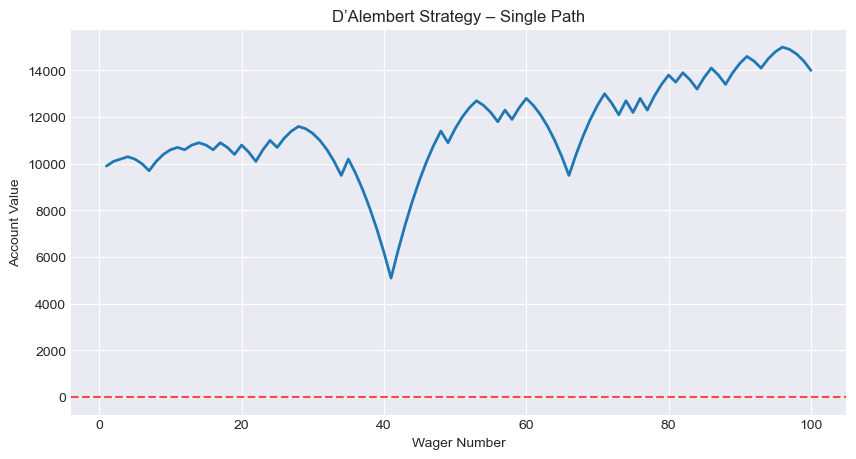

In [8]:
random.seed(42)

def trial():
    return roulette_like_trial(p_win)

wagers, values = dalembert_bettor(
    initial_funds=initial_funds,
    initial_stake=stake,
    n_rounds=n_rounds,
    rng_fn=trial
)

plt.figure(figsize=(10,5))
plt.plot(wagers, values, linewidth=2)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xlabel("Wager Number")
plt.ylabel("Account Value")
plt.title("D’Alembert Strategy – Single Path")
plt.show()

- Stake adjustments occur more gradually, eliminating the extreme crashes of the Martingale strategy.
- Essentially, losing streaks increase risk more slowly than under the Martingale.
- Prolonged negative drift can still lead to bankroll exhaustion.

## 3. Monte Carlo Simulation Over Many Bettors

A Monte Carlo analysis is performed to examine the distribution of final bankroll values and the likelihood of ruin under the D’Alembert strategy.

In [9]:
n_bettors = 500

final_values, broke_count = run_simulation(
    dalembert_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors,
    p_win=p_win,
    seed=42
)

print("Bettors who went broke: " + str(broke_count))
print("Broke rate: " + str(round(broke_count / n_bettors * 100, 2)) + " %")

mean_value = np.mean(final_values)
median_value = np.median(final_values)

print("Mean final wealth: " + str(round(mean_value, 2)))
print("Median final wealth: " + str(round(median_value, 2)))

Bettors who went broke: 123
Broke rate: 24.6 %
Mean final wealth: 9173.0
Median final wealth: 11400.0


## 4. Histogram of Final Wealth

The histogram illustrates the distribution of final bankrolls produced by the D’Alembert strategy.

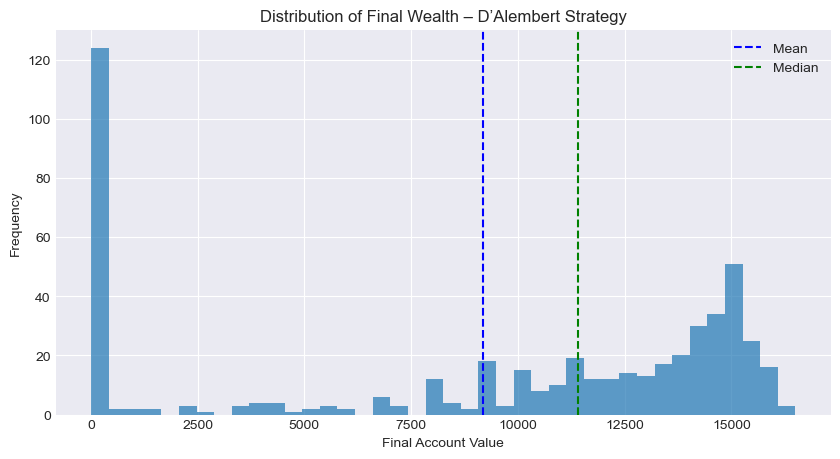

In [11]:
plt.figure(figsize=(10,5))
plt.hist(final_values, bins=40, alpha=0.7)
plt.axvline(mean_value, color="blue", linestyle="--", label="Mean")
plt.axvline(median_value, color="green", linestyle="--", label="Median")
plt.title("Distribution of Final Wealth – D’Alembert Strategy")
plt.xlabel("Final Account Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Summary

- The D’Alembert strategy adjusts stakes linearly, reducing exposure to extreme losses.
- Compared to Martingale, variance is significantly lower.
- Ruin remains possible under prolonged negative drift.
- The expected value of the game remains decidedly negative.

This strategy represents a compromise between flat betting and aggressive loss-recovery systems, offering smoother bankroll trajectories at the cost of slower recovery.